# The Sparks Foundation
## Data Science and Business Analytics Internship Program

### Name: **Jinsmon Joseph**

## Prediction using Supervised ML

**Problem statement:**
1. Predict the percentage of an student based on the number of study hours
2. what will be predicted score if a student studies for 9.25 hrs/day

In [2]:
#Importing all libraries required in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import library to split the training-test sample
from sklearn.model_selection import train_test_split

#To ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

#Import library for linear regression
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#Check missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'Percentage Score')

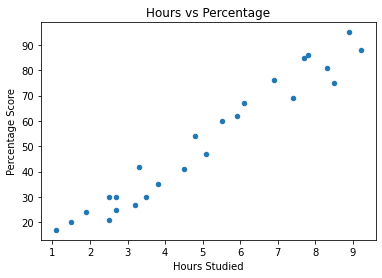

In [11]:
#Scatter plot to find the correlation between score and hours
df.plot(kind="scatter",x="Hours",y="Scores")
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [12]:
#Correlation matrix
cor_matrix=df.corr()
cor_matrix

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


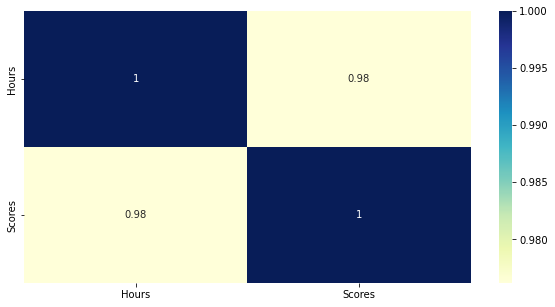

In [13]:
#Plot correlations on a heatmap

#figure size
plt.figure(figsize=(10,5))

#Heatmap
sns.heatmap(cor_matrix,cmap="YlGnBu",annot=True) #YlGnBu
plt.show()

**Preparing the Data**

In [15]:
#Create x and y
X=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [16]:
#Split data into training and test samples
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

In [17]:
#Check sample size
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(17, 1) (17,) (8, 1) (8,)


**Training the Algorithm**

In [19]:
#Import library for linear regression
from sklearn.linear_model import LinearRegression

In [20]:
#create a model object
regressor=LinearRegression()

In [22]:
#Fit the model
regressor.fit(X_train,y_train)
#Check accuracy of training model
regressor.score(X_train,y_train)

0.9484997422695115

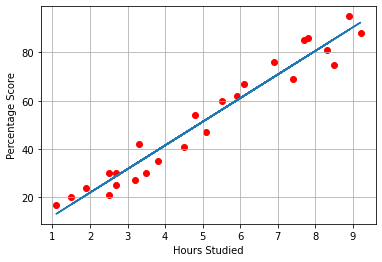

In [23]:
#Plotting the regression line
m=regressor.coef_
c=regressor.intercept_
line=m*x+c

#Plotting for the test data
plt.scatter(x,y,c='r')
plt.plot(x,line)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

**Making Predictions**

In [24]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [26]:
#Predict y
y_pred=regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [27]:
#Check test prediction accuracy
regressor.score(X_test,y_test)

0.9568211104435257

In [28]:
#Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [29]:
#Predict the response from xtest
hours=9.25
own_pred=regressor.predict([[hours]])
print("No of Hours={}".format(hours))
print("Predicted Score={}".format(own_pred[0]))

No of Hours=9.25
Predicted Score=92.91505723477056


**Evaluating the model**

In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
